<a href="https://www.kaggle.com/code/masterud/sklearn-ml-cv?scriptVersionId=93376101" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import trange, tqdm

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from PIL import Image
import cv2

In [2]:
#image = '../input/dataset-figure/sam_1.jpg'
#gray=cv2.imread(image,0)
#gray

#fname = '../input/dataset-figure/sam_1.jpg'
#label = 'cicle'
#image = Image.open(fname).convert("L")
#arr = np.asarray(image)
#arr.shape

# Векторизация изображений

In [3]:
df = pd.read_csv('../input/data-figure/data.csv')
df.info()

df = df[['name_file','path_file', 'class_name', 'class_num']]

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   path_file   360 non-null    object
 1   name_file   360 non-null    object
 2   class_num   360 non-null    int64 
 3   class_name  360 non-null    object
 4   n           360 non-null    object
 5   k           360 non-null    object
 6   l           360 non-null    int64 
 7   m           360 non-null    object
dtypes: int64(2), object(6)
memory usage: 22.6+ KB


,name_file,path_file,class_name,class_num
0,sam_1.jpg,../input/dataset-figure/sam_1.jpg,circle,1
1,sam_2.jpg,../input/dataset-figure/sam_2.jpg,circle,1
2,sam_3.jpg,../input/dataset-figure/sam_3.jpg,circle,1
3,sam_4.jpg,../input/dataset-figure/sam_4.jpg,circle,1
4,sam_5.jpg,../input/dataset-figure/sam_5.jpg,circle,1


In [4]:
df = df.sample(frac = 1, replace = False, random_state=42)
df.head()

,name_file,path_file,class_name,class_num
224,sam_225.jpg,../input/dataset-figure/sam_225.jpg,square,2
42,sam_43.jpg,../input/dataset-figure/sam_43.jpg,circle,1
285,sam_286.jpg,../input/dataset-figure/sam_286.jpg,triangle,3
302,sam_303.jpg,../input/dataset-figure/sam_303.jpg,triangle,3
56,sam_57.jpg,../input/dataset-figure/sam_57.jpg,circle,1


In [5]:
def convert_image(path):
    '''Функция принимает на вход полный путь до файла изображения
    На выходе получаем вектор изображения в оттенках серого.
    '''
    image = Image.open(path).convert("L")
    arr = np.asarray(image)
    return arr


def join_list(list):
    '''Функция для объединения нескольких списков в один
    с использованием метода extend()
    '''
    list_n = []
    for elem in list:
        list_n.extend(elem)
    return list_n


df['img'] = df['path_file'].apply(convert_image)
df['vector_img'] = df['img'].apply(join_list)
df.head()

,name_file,path_file,class_name,class_num,img,vector_img
224,sam_225.jpg,../input/dataset-figure/sam_225.jpg,square,2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
42,sam_43.jpg,../input/dataset-figure/sam_43.jpg,circle,1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
285,sam_286.jpg,../input/dataset-figure/sam_286.jpg,triangle,3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
302,sam_303.jpg,../input/dataset-figure/sam_303.jpg,triangle,3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
56,sam_57.jpg,../input/dataset-figure/sam_57.jpg,circle,1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."


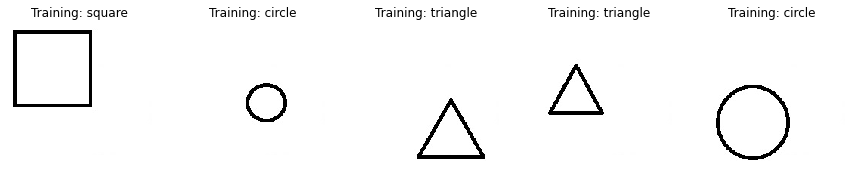

In [6]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
for ax, image, label in zip(axes, df.img, df.class_name):
    ax.set_axis_off()
    ax.imshow(image, cmap='gray', interpolation="nearest")
    ax.set_title("Training: " + label)

In [7]:
# flatten the images
data = np.array(df.vector_img.to_list())
target = np.array(df.class_num.to_list())

In [8]:
n_samples = len(data)
data = data.reshape((n_samples, -1))

In [9]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.25, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

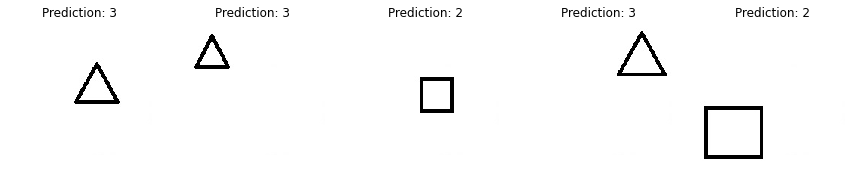

In [10]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
for ax, image, label in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(188, 192)
    ax.imshow(image, cmap='gray', interpolation="nearest")
    ax.set_title("Prediction: " + str(label))

In [11]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        30

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90




Confusion matrix:
[[32  0  0]
 [ 0 28  0]
 [ 0  0 30]]


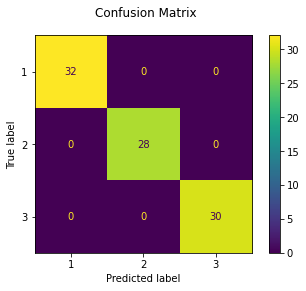

In [12]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()